In [1]:
%matplotlib inline
import matplotlib
import ternary
from ternary.helpers import simplex_iterator
import pandas

In [2]:
# The graph is normalized to the scale value, such that x + y + z = scale always. Higher numbers may significantly slow the run-time, because the heatmap considers all 3-integer combinations that add up to the scale.
scale = 100

# Grapher has all of the actual graphing functions in it. See https://github.com/marcharper/python-ternary/blob/master/examples/Ternary-Examples.ipynb for formatting and details.
# It takes as input a name (for the graph) and a set of points (generated through Grabber).
def Grapher(name, points):
    matplotlib.rcParams['figure.dpi'] = 200
    matplotlib.rcParams['figure.figsize'] = (4, 4)
    figure, tern_ax = ternary.figure(scale=scale)
    tern_ax.boundary(linewidth=1)
    tern_ax.gridlines(color="blue", multiple=5)
    tern_ax.set_title(name, fontsize=10)
    
    tern_ax.heatmap(points, style='triangular')

    tern_ax.clear_matplotlib_ticks()
    tern_ax.get_axes().axis('off')

# This generates the heat-map, with coefficients a, b, c, and 'name' as the name of the graph. simplex_iterator generates all 3-combinations of integers such that x + y + z = N (in this case 100).
# You can run Grabber manually by inputting the coefficients, or run Parser on a csv file to automatically generate all graphs.
def Grabber(name, a, b, c):
    f_xyz = dict()
    for (i, j, k) in simplex_iterator(scale):
        f_xyz[(i,j,k)] = (a*i + b*j + c*k)
    Grapher(name, f_xyz)

# Reads and parses a CSV file. Uses Pandas for simplicity (to avoid all the Python I/O language).
def Parser(file):
    df = pandas.read_csv(file)
    college = []
    a_lst = []
    b_lst = []
    c_lst = []
    for i in range(0, len(df.index)-2):
        college.append(df.iloc[i]['College'])
        a_lst.append(df.iloc[i]['Credit hour fraction'])
        b_lst.append(df.iloc[i]['Degrees awarded fraction'])
        c_lst.append(df.iloc[i]['Research funding fraction'])
    return college, a_lst, b_lst, c_lst

# Feeds the parsed lists into the Grabber, if Parser was used.
def Feeder(college, a_lst, b_lst, c_lst):
    for i in range(0, len(a_lst)):
        Grabber(college[i], float(a_lst[i]), float(b_lst[i]), float(c_lst[i]))

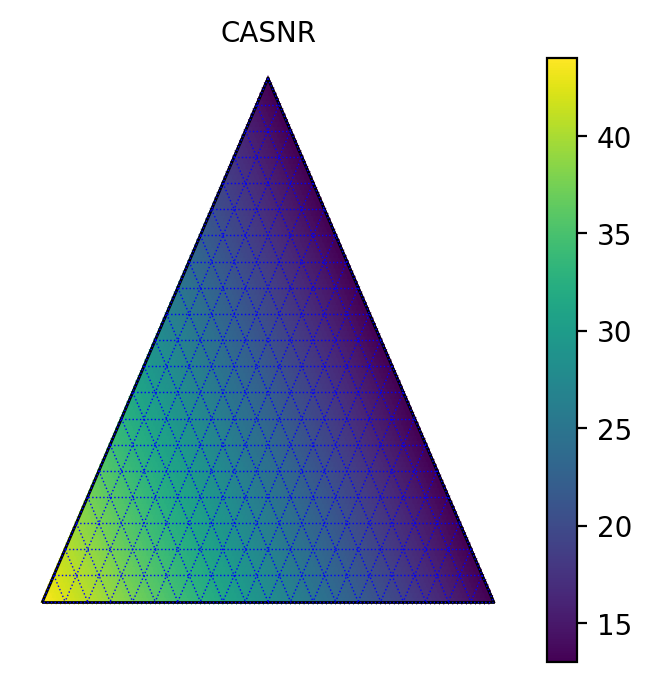

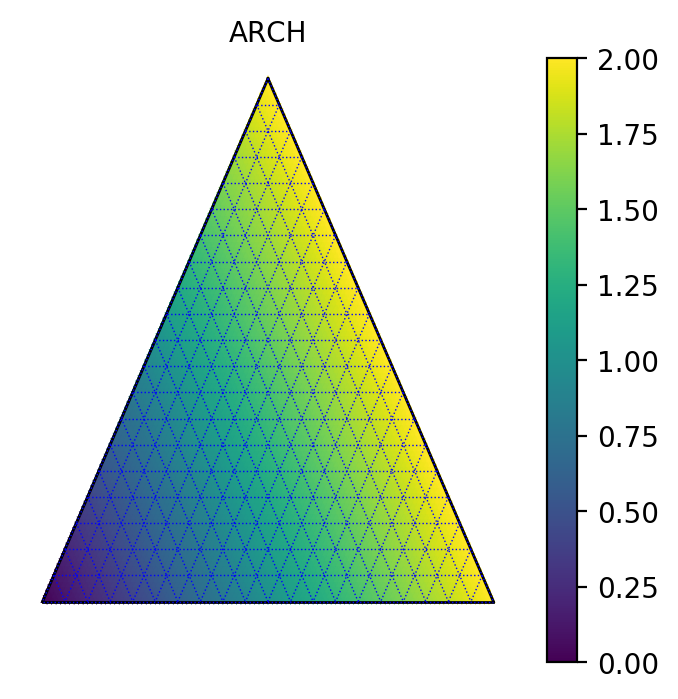

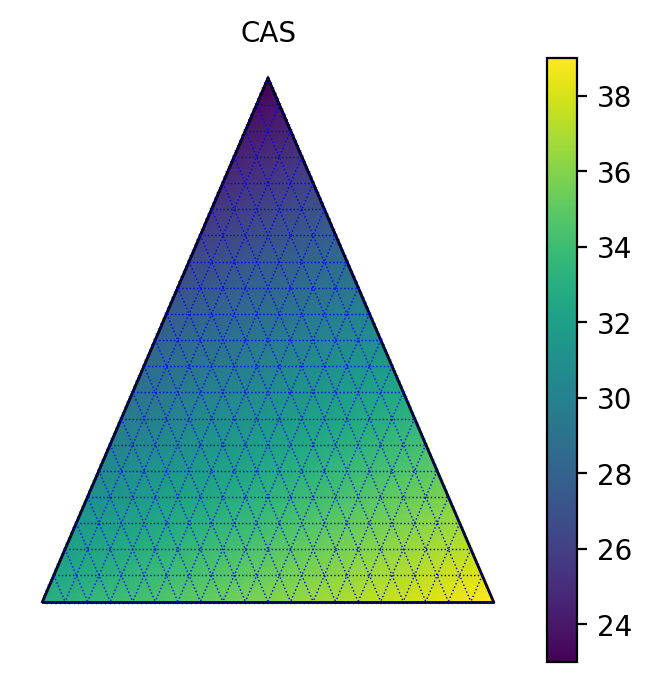

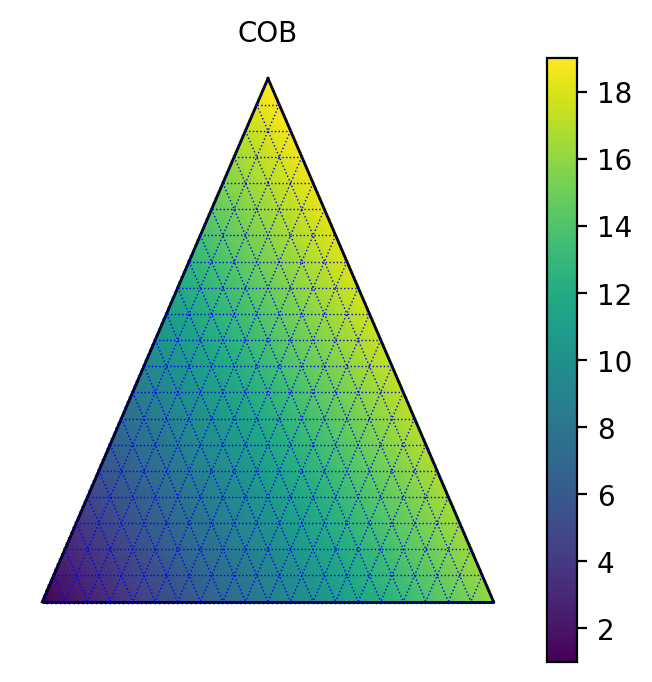

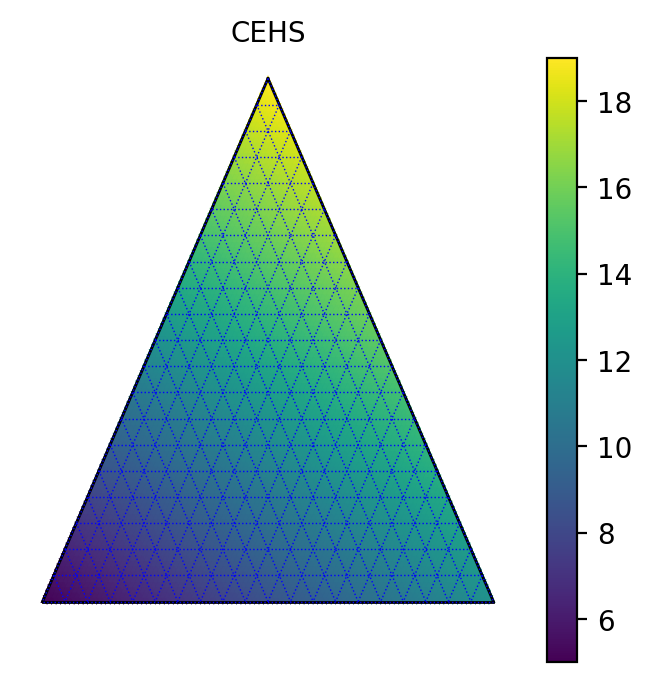

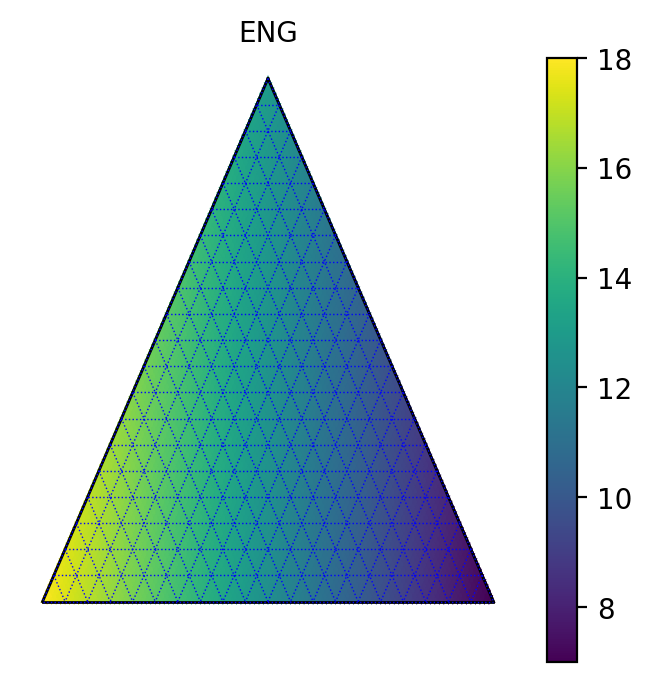

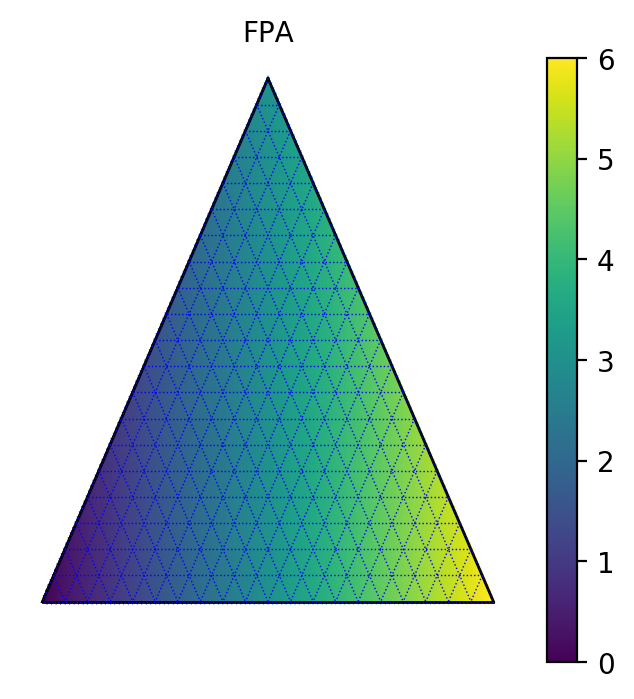

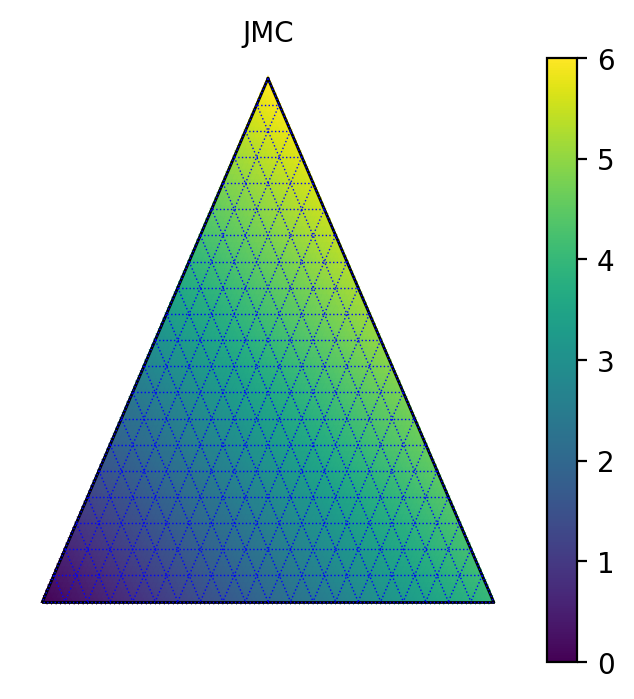

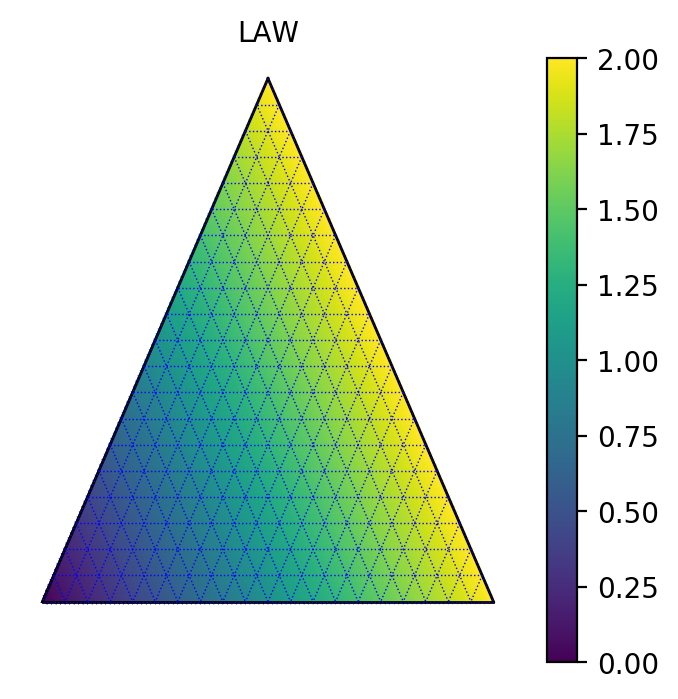

In [3]:
# Automatically run through CSV file ot generate all data graphs.
college, a_lst, b_lst, c_lst = Parser('data.csv')
Feeder(college, a_lst, b_lst, c_lst)

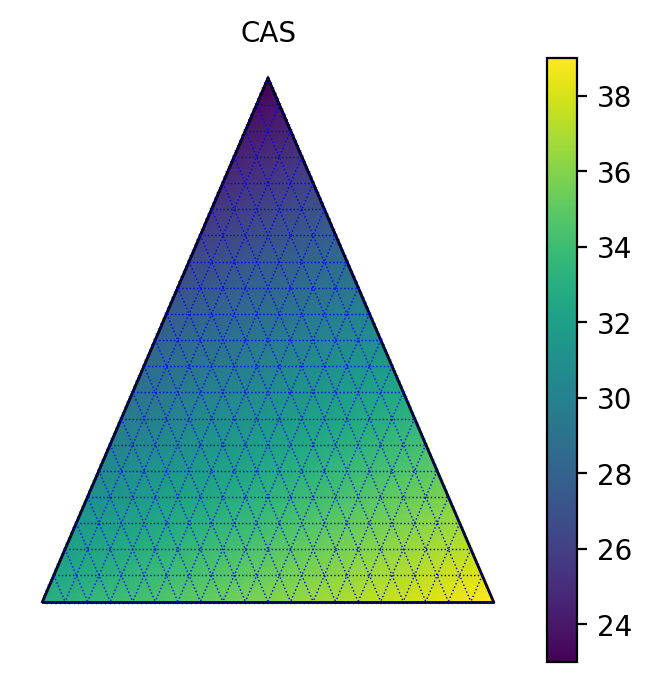

In [4]:
# Manually input coefficients to generate a single data graph.
Grabber('CAS', 0.39, 0.23, 0.33)